In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

In [3]:
NUM_CLASSES = 10

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    #tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                860       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 1,180
Trainable params: 1,180
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(verbose=1, patience=20)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
#while(1):
history = model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)
    # Model evaluation

 #   if(val_acc>0.97):
  #      break

Epoch 1/1000


2023-01-19 13:35:40.191222: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


214/223 [===========================>..] - ETA: 0s - loss: 2.0424 - accuracy: 0.2812
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
223/223 [==============================] - 0s 985us/step - loss: 2.0310 - accuracy: 0.2874 - val_loss: 1.7139 - val_accuracy: 0.4723
Epoch 2/1000
121/223 [===============>..............] - ETA: 0s - loss: 1.4798 - accuracy: 0.5946
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
223/223 [==============================] - 0s 615us/step - loss: 1.3063 - accuracy: 0.6442 - val_loss: 0.9551 - val_accuracy: 0.7425
Epoch 3/1000
110/223 [=============>................] - ETA: 0s - loss: 0.8294 - accuracy: 0.7871
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
223/223 [==============================] - 0s 652us/step - loss: 0.7229 - accuracy: 0.8260 - val_loss: 0.5352 - val_accuracy: 0.8572
Epoch 4/1000
202/223 [==========================>...] - ETA: 0s - loss: 0.4297 - accuracy: 0

Epoch 28/1000
222/223 [============================>.] - ETA: 0s - loss: 0.0157 - accuracy: 0.9969
Epoch 28: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
223/223 [==============================] - 0s 652us/step - loss: 0.0157 - accuracy: 0.9969 - val_loss: 0.0139 - val_accuracy: 0.9975
Epoch 29/1000
122/223 [===============>..............] - ETA: 0s - loss: 0.0127 - accuracy: 0.9978
Epoch 29: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
223/223 [==============================] - 0s 604us/step - loss: 0.0148 - accuracy: 0.9974 - val_loss: 0.0143 - val_accuracy: 0.9971
Epoch 30/1000
121/223 [===============>..............] - ETA: 0s - loss: 0.0128 - accuracy: 0.9972
Epoch 30: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
223/223 [==============================] - 0s 611us/step - loss: 0.0143 - accuracy: 0.9973 - val_loss: 0.0131 - val_accuracy: 0.9973
Epoch 31/1000
121/223 [===============>..............] - ETA: 0s - loss: 

223/223 [==============================] - 0s 610us/step - loss: 0.0070 - accuracy: 0.9982 - val_loss: 0.0077 - val_accuracy: 0.9982
Epoch 55/1000
120/223 [===============>..............] - ETA: 0s - loss: 0.0067 - accuracy: 0.9984
Epoch 55: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
223/223 [==============================] - 0s 608us/step - loss: 0.0070 - accuracy: 0.9983 - val_loss: 0.0083 - val_accuracy: 0.9976
Epoch 56/1000
121/223 [===============>..............] - ETA: 0s - loss: 0.0074 - accuracy: 0.9984
Epoch 56: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
223/223 [==============================] - 0s 614us/step - loss: 0.0067 - accuracy: 0.9983 - val_loss: 0.0083 - val_accuracy: 0.9979
Epoch 57/1000
123/223 [===============>..............] - ETA: 0s - loss: 0.0074 - accuracy: 0.9982    
Epoch 57: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
223/223 [==============================] - 0s 606us/step - loss: 0.00

120/223 [===============>..............] - ETA: 0s - loss: 0.0039 - accuracy: 0.9988    
Epoch 81: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
223/223 [==============================] - 0s 623us/step - loss: 0.0040 - accuracy: 0.9989 - val_loss: 0.0057 - val_accuracy: 0.9985
Epoch 82/1000
122/223 [===============>..............] - ETA: 0s - loss: 0.0048 - accuracy: 0.9988
Epoch 82: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
223/223 [==============================] - 0s 606us/step - loss: 0.0039 - accuracy: 0.9989 - val_loss: 0.0050 - val_accuracy: 0.9986
Epoch 83/1000
121/223 [===============>..............] - ETA: 0s - loss: 0.0031 - accuracy: 0.9993    
Epoch 83: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
223/223 [==============================] - 0s 610us/step - loss: 0.0038 - accuracy: 0.9991 - val_loss: 0.0056 - val_accuracy: 0.9984
Epoch 84/1000
122/223 [===============>..............] - ETA: 0s - loss: 0.0046

223/223 [==============================] - 0s 614us/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.0050 - val_accuracy: 0.9984
Epoch 108/1000
119/223 [===============>..............] - ETA: 0s - loss: 0.0028 - accuracy: 0.9993    
Epoch 108: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
223/223 [==============================] - 0s 611us/step - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.0047 - val_accuracy: 0.9989
Epoch 109/1000
120/223 [===============>..............] - ETA: 0s - loss: 0.0025 - accuracy: 0.9992    
Epoch 109: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
223/223 [==============================] - 0s 611us/step - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.0046 - val_accuracy: 0.9983
Epoch 110/1000
122/223 [===============>..............] - ETA: 0s - loss: 0.0020 - accuracy: 0.9994    
Epoch 110: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
223/223 [==============================] - 0s 606us/ste

In [12]:
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

75/75 [==============================] - 0s 440us/step - loss: 0.0047 - accuracy: 0.9991


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 31ms/step
[6.73681616e-18 1.03927809e-34 3.26148652e-21 1.71668777e-13
 3.36444869e-12 0.00000000e+00 3.58915018e-16 1.16656455e-17
 1.00000000e+00 1.84615817e-28]
8


In [15]:
print("list of layers :",model.layers)
print("\nmodel.layers[1].name :",model.layers[1].name)
#print("\nmodel.get_layer('dense_1') :",model.get_layer('dense_18'))

list of layers : [<keras.layers.core.dense.Dense object at 0x282560160>, <keras.layers.core.dense.Dense object at 0x28072adf0>, <keras.layers.core.dense.Dense object at 0x28254e070>]

model.layers[1].name : dense_1


In [16]:
hidden1 = model.layers[1]

weights, bias = hidden1.get_weights()

print(hidden1)

# Model epoch graph

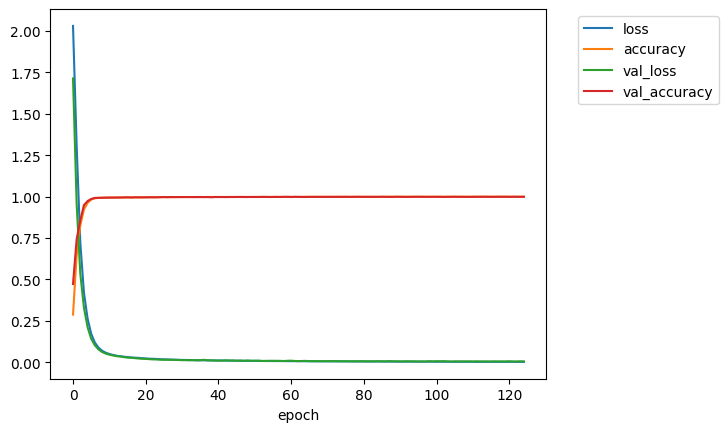

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()
plt.xlabel("epoch")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

# Confusion matrix

297/297 [==============================] - 0s 326us/step


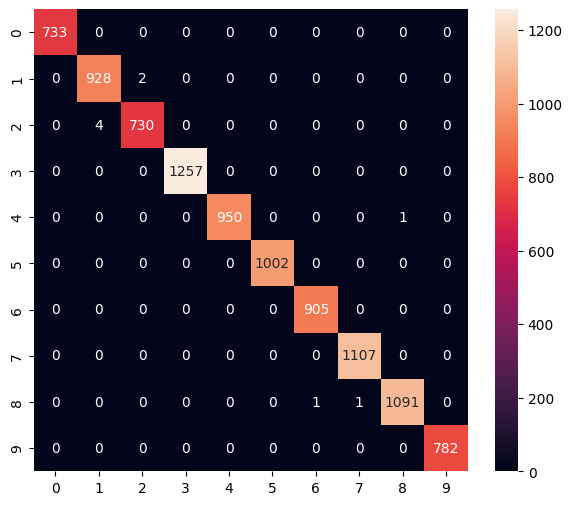

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       733
           1       1.00      1.00      1.00       930
           2       1.00      0.99      1.00       734
           3       1.00      1.00      1.00      1257
           4       1.00      1.00      1.00       951
           5       1.00      1.00      1.00      1002
           6       1.00      1.00      1.00       905
           7       1.00      1.00      1.00      1107
           8       1.00      1.00      1.00      1093
           9       1.00      1.00      1.00       782

    accuracy                           1.00      9494
   macro avg       1.00      1.00      1.00      9494
weighted avg       1.00      1.00      1.00      9494



In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))
        

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [19]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [20]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/8q/vlmnznqn30j_xgpcjqgc1cnm0000gn/T/tmpd5sz6o74/assets


INFO:tensorflow:Assets written to: /var/folders/8q/vlmnznqn30j_xgpcjqgc1cnm0000gn/T/tmpd5sz6o74/assets
2023-01-19 13:35:59.609000: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2023-01-19 13:35:59.609022: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2023-01-19 13:35:59.610630: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/8q/vlmnznqn30j_xgpcjqgc1cnm0000gn/T/tmpd5sz6o74
2023-01-19 13:35:59.611157: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-01-19 13:35:59.611162: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /var/folders/8q/vlmnznqn30j_xgpcjqgc1cnm0000gn/T/tmpd5sz6o74
2023-01-19 13:35:59.612544: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled
2023-01-19 13:35:59.612941: I tensorflow/cc/saved_model/load

6808